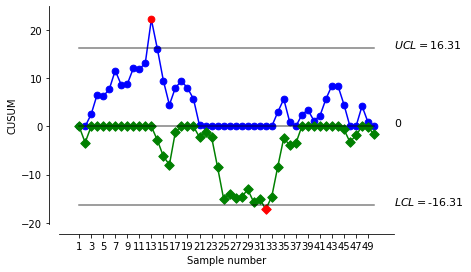

In [68]:
#TIME WEIGHTED CHARTS CUSUM
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
data = read_excel()#upload Chap3.xlsx CUSUM tab
#parameters
L = 3.
lmda = 0.2
h= 5.
d2 = 1.128
xr = data.xt
mrbar = mean([abs(data.xt[i] -data.xt[i-1]) for i in range(1,len(data.xt))])
sigma = mrbar/d2
K = sigma*0.5
target = 10.# for python2
xbar = target #mean(xr)
#set up control limits
c1 =[0.]
c2 = [0.]
for i in range(len(xr)):
    c1i = max(0, xr[i] - (xbar + K) + c1[i])   
    c2i = min(0,  xr[i]-xbar + K +c2[i])
    c1.append(c1i)
    c2.append(c2i)
UCL = [h*sigma]*len(xr)
LCL = [-h*sigma]*len(xr)
CL = [0]*len(xr)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
markers1 = []
colors1 = []
for i in range (len(data)):
    x1 = c1[i+1]
    if x1 > UCL[i]:
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')        
for i in range (len(data)):
    x2 = c2[i+1]
    if  x2 <LCL[i]:
        markers1.append('D')
        colors1.append('r')
    else:
        markers1.append('D')
        colors1.append('g')     
#Plotting CUSUM chart
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(c1[1:],'b-',zorder=1)
ax1.plot(c2[1:],'g-',zorder=1)
for x,y,c,m in zip(t, c1[1:], colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
for x,y,c,m in zip(t, c2[1:], colors1, markers1):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)   
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('CUSUM')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[0],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate (''+str(round(abs(CL[0]),2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[0],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(xr), step = 2), arange(1, len(xr)+1, step = 2))
show()


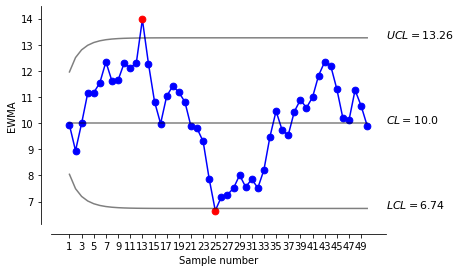

In [69]:
##TIME WEIGHTED CHARTS EWMA chart
#Import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an excel spreadsheet
data = read_excel()#upload Chap3.xlsx CUSUM tab
L = 3.
lmda = 0.2
d2 = 1.128
mrbar = mean([abs(data.xt[i] -data.xt[i-1]) for i in range(1,len(data.xt))])
target = 10.
xbar = target 
sigma = mrbar/d2
term1 = lmda/(2.-lmda)
term2 = (1.-lmda)
xr = []
xr0 = data.xt
#set up control charts
UCL = [xbar + L*sigma*sqrt(term1*(1. - term2**(2*i))) for i in range (1, len(xr0)+1)]
LCL = [xbar - L*sigma*sqrt(term1*(1. - term2**(2*i))) for i in range (1, len(xr0)+1)]
CL = [xbar]*len(xr0)
zv = [xbar]
for i in range(len(xr0)):
    z = lmda*xr0[i] + (1.-lmda)*(zv[i])
    zv.append(z)
    xr.append(z)
#mark red a point that falls outside of the control limits. Otherwise, mark the point blue
markers = []
colors = []
for i in range (len(xr0)):
    x1 = xr[i]
    x2 = UCL[i]
    x3 = LCL[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting EWMA chart
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCL, 'k-', alpha = 0.5)
ax1.plot(LCL, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Sample number')
ax1.set_ylabel('EWMA')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL=$'+str(round(UCL[-1],2)), xy = (xlim()[1], list(UCL)[-1]), xytext = (xlim()[1],list(UCL)[-1]),fontsize = 11)
ax1.annotate ('$CL=$'+str(round(CL[0],2)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCL[-1],2)), xy = (xlim()[1], list(LCL)[-1]), xytext = (xlim()[1],list(LCL)[-1]),fontsize = 11)
#set xticks to start from one since Python starts counting from zero
xticks(arange(len(xr), step = 2), arange(1, len(xr)+1, step = 2))
show()


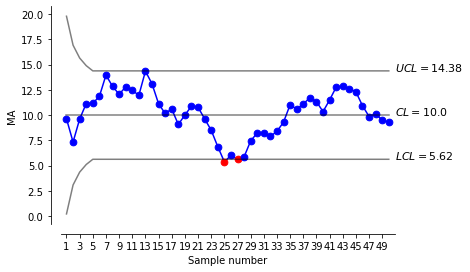

In [70]:
##TIME WEIGHTED CHARTS MA chart
#Import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from an excel spreadsheet
data = read_excel()#upload Chap3.xlsx CUSUM tab
#if column names in Excel, select the column of interest (e.g., data = data['column name']
#initialize parameters
xr = []
w0 = 5#morving range
L = 3.
d2 = 1.128
w = [min(i, w0) for i in range (1,len(data) +1)]
mrbar = mean([abs(data.xt[i] -data.xt[i-1]) for i in range(1,len(data.xt))])
sigma = mrbar/d2
data = list(data.xt)
target = 10.
xbar = target 
for i in range (len(w)):
    #j is the beginning and w[i] is the end of the sliding scale
    j = 0
    if i < w[i]:#beginning of the moving average
        j = 0
    else:
        j = i-w[i]+1
    m =data[j:j+w[i]]
    n = len(m)
    Mi =  sum(m)/n
    xr.append(Mi)

UCLa = [xbar + L*sigma/sqrt(w[i]) for i in range(len(w))]
LCLa = [xbar - L*sigma/sqrt(w[i]) for i in range(len(w))]
CLa = [xbar]*len(xr0)

markers = []
colors = []

for i in range (len(xr)):
    x1 = xr[i]
    x2 = UCLa[i]
    x3 = LCLa[i]
    if (x1 > x2 or  x1<x3) :
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
#Plotting
fig=figure()
ax1 =  fig.add_subplot(111)
t = arange(len(data))
ax1.plot(UCLa, 'k-', alpha = 0.5)
ax1.plot(LCLa, 'k-',alpha = 0.5)
ax1.plot(CLa, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
#ylim(0, 20) 
xlim(-0.9, t[-1]+1) 
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
ax1.set_xlabel('Sample number')
ax1.set_ylabel('MA')

ax1.annotate ('$UCL=$'+str(round(UCLa[-1],2)), xy = (xlim()[1], list(UCLa)[-1]), xytext = (xlim()[1],list(UCLa)[-1]),fontsize = 11)
ax1.annotate ('$CL=$'+str(round(CLa[0],2)), xy = (xlim()[1], list(CLa)[-1]), xytext = (xlim()[1],list(CLa)[-1]),fontsize = 11)
ax1.annotate ('$LCL=$'+str(round(LCLa[-1],2)), xy = (xlim()[1], list(LCLa)[-1]), xytext = (xlim()[1],list(LCLa)[-1]),fontsize = 11)

xticks(arange(len(xr), step = 2), arange(1, len(xr)+1, step = 2))
#ax1.legend(fancybox=True,fontsize='medium',markerscale=0.8,labelspacing=0.1).draggable()

ax1.yaxis.set_ticks_position('left') #remove yticks from right up 
ax1.xaxis.set_ticks_position('bottom') #remove yticks from right up 
show()
#print LCLa